<a href="https://colab.research.google.com/github/MHRDYN7/Tensorflow-Keras/blob/main/Basic_Conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#x_train = x_train.reshape(-1,28*28).astype("float32")/255
#x_test = x_test.reshape(-1,28*28).astype("float32")/255
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255


In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
ModelS = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, 3, padding="valid", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation="relu"),
    layers.MaxPooling2D(),
])

In [5]:
from keras.utils import plot_model

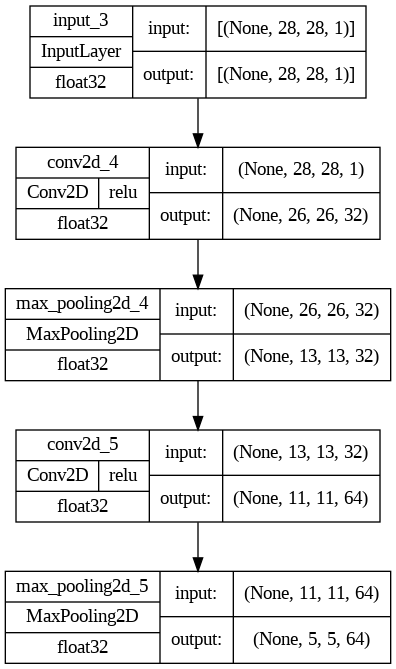

In [18]:
plot_model(ModelS, show_shapes=True, show_dtype=True, show_layer_activations=True)

In [19]:
ModelS.add(keras.Sequential([
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10)
]))

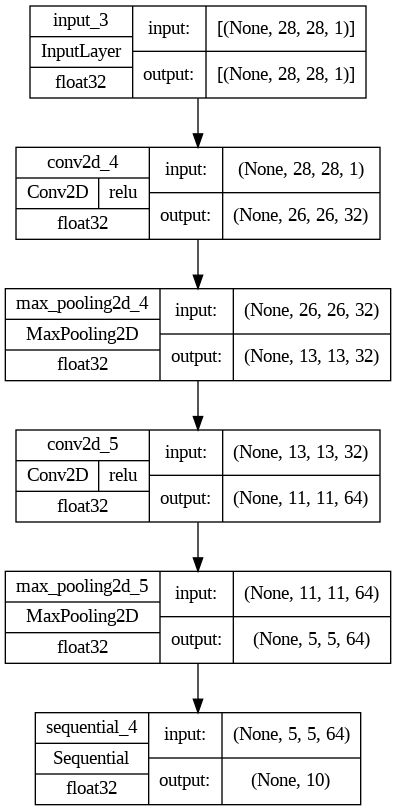

In [20]:
plot_model(ModelS, show_shapes=True, show_dtype=True, show_layer_activations=True)

In [21]:
ModelS.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

In [22]:
ModelS.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 54s 28ms/step - loss: 2.4534 - accuracy: 0.1367
Epoch 2/10
1875/1875 [==============================] - 50s 27ms/step - loss: 2.3026 - accuracy: 0.0987
Epoch 3/10
1875/1875 [==============================] - 52s 28ms/step - loss: 2.3026 - accuracy: 0.0987
Epoch 4/10
1875/1875 [==============================] - 53s 28ms/step - loss: 2.3026 - accuracy: 0.0987
Epoch 5/10
 102/1875 [>.............................] - ETA: 43s - loss: 2.3026 - accuracy: 0.0888

KeyboardInterrupt: ignored

In [23]:
from keras.datasets import cifar10

In [24]:
(x_train,y_train),(x_test, y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [25]:
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255


In [26]:
CifarModel = keras.Sequential(
    [
        keras.Input(shape=(32, 32, 3)),
        layers.Conv2D(32, 3, padding="valid", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(128, 3, activation="relu"),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(10),
    ]
)

In [29]:
CifarModel.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

In [30]:
CifarModel.fit(x_train, y_train, batch_size=64, epochs=5, verbose=2)

Epoch 1/5
782/782 - 66s - loss: 4.7163 - accuracy: 0.0992 - 66s/epoch - 84ms/step
Epoch 2/5
782/782 - 60s - loss: 5.3033 - accuracy: 0.1000 - 60s/epoch - 77ms/step
Epoch 3/5
782/782 - 64s - loss: 5.3031 - accuracy: 0.1000 - 64s/epoch - 82ms/step
Epoch 4/5
782/782 - 60s - loss: 5.3031 - accuracy: 0.1000 - 60s/epoch - 77ms/step
Epoch 5/5
782/782 - 62s - loss: 4.1725 - accuracy: 0.0996 - 62s/epoch - 79ms/step


In [31]:
#Check the link https://www.tensorflow.org/tutorials/images/cnn